<a href="https://colab.research.google.com/github/amazzoli/Quantitative_immunology/blob/main/notebooks/Noiset_3_detection_of_responding_clones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

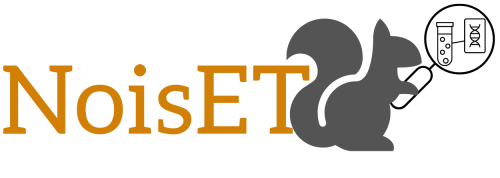

# Inferring responding immune clonotypes

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#deciding format of the figures
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)

## Part 3 - Inferring the contracted clonotypes

In [2]:
# We are installing noisets to use it !
!pip install noisets

from noisets import noisettes as ns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%%bash
git clone https://github.com/mbensouda/NoisET_tutorial.git

Cloning into 'NoisET_tutorial'...
Updating files: 100% (22340/22340), done.


### 3.1 - Loading data

For this analysis we will focus on the first time point, day 15, and day 45.
This tables are imported below using a noiset utility.

**Notice that by default noiset looks for expansion, while here we look for contraction. A simple trick for fixing this is just to invert the time points.**

In [4]:
# Data information 
path = 'NoisET_tutorial/data/'
filename1 = 'MP_45_F1_short.zip' # sample for individual M at day 45 of the study
filename2 = 'MP_15_F1_short.zip' # sample for individual M at day 15 of the study
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

# check 
MP_contraction = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , MP_contraction.filename1)
print("Second Filename is : ",  MP_contraction.filename2)
print("Name of the columns of first file are : ", MP_contraction.colnames1)
print("Name of the columns of second file are : ", MP_contraction.colnames2)

n, df_contraction = MP_contraction.import_data()

First Filename is :  MP_45_F1_short.zip
Second Filename is :  MP_15_F1_short.zip
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']


/usr/local/lib/python3.10/dist-packages/noisets/noisettes.py:99: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mergedFrame.drop(newnames[3]+suffixes[1], 1,inplace=True) #removes duplicates


In [5]:
df_contraction

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.046930,4.600179e-02,106262.0,89845.0,TGTGCCAGCAGCGCCCCAGCGGGGGTCGGCGAGCAGTACTTC,CASSAPAGVGEQYF
1,0.039028,3.961802e-02,88368.0,77377.0,TGTGCCAGCAGCCCAAGGGCAGGGAAGGGTGAGCAGTTCTTC,CASSPRAGKGEQFF
2,0.020447,2.154908e-02,46296.0,42087.0,TGTGCCAGCAGCCCGCCGGGACAGCACAATGAGCAGTTCTTC,CASSPPGQHNEQFF
3,0.019505,2.572711e-02,44165.0,50247.0,TGTGCCAGCAGTTTTTGGACACCCTACGAGCAGTACTTC,CASSFWTPYEQYF
4,0.013851,1.603727e-02,31363.0,31322.0,TGTGCCAGCAGCTTGGAAGGGTACGGGACGCCGGCTGAAGCTTTCTTT,CASSLEGYGTPAEAFF
...,...,...,...,...,...,...
1199118,0.000000,5.120128e-07,0.0,1.0,TGTGCCAGCGGC,CASG
1199119,0.000000,5.120128e-07,0.0,1.0,TGTGCCAGCACC,CAST
1199120,0.000000,5.120128e-07,0.0,1.0,TGTACCCTGGGC,CTLG
1199121,0.000000,5.120128e-07,0.0,1.0,TGTAGACTCTTC,CRLF


<ipython-input-6-47c78d2ce481>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


(2.5e-07, 0.1, 2.5e-07, 0.1)

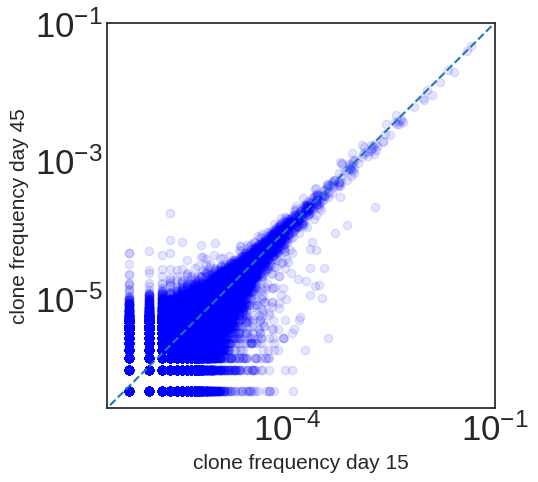

In [6]:
plt.figure(figsize=(5,5))
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-white')
plt.scatter(df_contraction['Clone_fraction_2'], df_contraction['Clone_fraction_1'], color='blue', alpha = 0.1)
plt.plot(X,X, linestyle ='--')
plt.xlabel(r'clone frequency day 15', fontsize = 15)
plt.ylabel(r'clone frequency day 45', fontsize = 15)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])


### 3.2 Detection of contracting clones from day 15 to day 45

In [7]:
#Parameters of the noise model learnt in part II.
paras = [ -1.97822857,   1.25456411,   1.04465803, -10.14630235]
# Negative Binomial Sampling Noise Model
noise_model = 1 

Below the noiset utility for identifying expanded clonotypes is run. 
Two parameters can be tuned : `pval_threshold` is a threshold that controls  the permissiveness of the method (playing somehow the role of the statistical significance) and `smed_threshold` instead can control the weight to give to large colonotypes in being significant. 


In [8]:
expansion = ns.Expansion_Model() # Creating an object for which the associated methods are linked to the contraction/expansion
pval_threshold = 0.05  #Parameters to play with
smed_threshold = 0 # Parameters to play with

outpath = 'contracted_clones' # name of the file Chose what you want 

#Learn the contraction/expansion model + compute different statistics of the log-fold change variable + detect contracting clones
#This part should take approximatively 10 minutes
expansion.expansion_table(outpath, paras, paras, df_contraction, noise_model, pval_threshold, smed_threshold)

/usr/local/lib/python3.10/dist-packages/noisets/noisettes.py:520: RuntimeWarning: divide by zero encountered in true_divide
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.10/dist-packages/noisets/noisettes.py:520: RuntimeWarning: invalid value encountered in log
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.10/dist-packages/noisets/noisettes.py:622: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)


N_obs: 1199123
Calculation Surface : 

--- 966.241676568985 seconds ---


/usr/local/lib/python3.10/dist-packages/noisets/noisettes.py:935: RuntimeWarning: invalid value encountered in true_divide
  Ps_n1n2ps=Pn1n2_s*Ps[:,np.newaxis,np.newaxis]/Pn1n2_ps[np.newaxis,:,:]


writing to: contracted_clones


In [9]:
#Read the results 
#Board interlude to explain the different statistics 
table_expansion = pd.read_csv('contracted_clonestop_expanded.csv', sep = '\t')
table_expansion

,"$s_{1,low}$","$s_{2,med}$","$s_{3,high}$",$s_{max}$,$\bar{s}$,$f_1$,$f_2$,$n_1$,$n_2$,CDR3_nt,CDR3_AA,$1-P(s>0)$
0,2.045943,2.240795,2.338221,2.240795,2.213480,2.075747e-04,0.001895,470.0,3701.0,TGTGCCAGCAGCTTAGAAGACACAAACTATGGCTACACCTTC,CASSLEDTNYGYTF,1.269398e-273
1,0.292278,0.292278,0.292278,0.292278,0.292278,1.950540e-02,0.025727,44165.0,50247.0,TGTGCCAGCAGTTTTTGGACACCCTACGAGCAGTACTTC,CASSFWTPYEQYF,6.486955e-126
2,4.091887,5.066145,7.209515,4.871294,5.224374,2.649890e-06,0.000386,6.0,754.0,TGTGCCAGCAGCCCCACTGGCAGGGGAAGAACAGATACGCAGTATTTT,CASSPTGRGRTDTQYF,1.951553e-103
3,1.656240,1.851092,2.045943,1.851092,1.842162,1.165952e-04,0.000734,264.0,1433.0,TGTGCCAGCAGCTTGGCTAGCGAATCCTACAATGAGCAGTTCTTC,CASSLASESYNEQFF,2.213281e-86
4,0.292278,0.292278,0.292278,0.292278,0.292278,9.111646e-03,0.012363,20631.0,24146.0,TGTGCCAGCAGTTTGGGCGGGGTAGGGGATACGCAGTATTTT,CASSLGGVGDTQYF,3.104747e-73
...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.000000,7.696644,11.593679,0.000000,7.310275,0.000000e+00,0.000010,0.0,19.0,TGTGCCAGCAGTTCCTTGACAGGGGGAAAGCAGCCCCAGCATTTT,CASSSLTGGKQPQHF,4.874599e-02
584,0.000000,7.696644,11.593679,0.000000,7.310275,0.000000e+00,0.000010,0.0,19.0,TGTGCCAGCAGCACCACGTTTTCGGCTTTCTTT,CASSTTFSAFF,4.874599e-02
585,0.000000,1.363962,2.240795,1.363962,1.365507,1.015791e-05,0.000042,23.0,82.0,TGCAGTGCCGAGACCGCCGGGACAGGAGATCAGCCCCAGCATTTT,CSAETAGTGDQPQHF,4.919994e-02
586,0.000000,3.409906,7.014663,0.000000,3.488498,4.416483e-07,0.000015,1.0,29.0,TGTGCCAGCAGCTTAGTCGGGGGGTATTACAATGAGCAGTTCTTC,CASSLVGGYYNEQFF,4.941916e-02


We can visualise the contracted clonotypes identified by noiset as the red points in the scatter plot below.

<ipython-input-10-56e59a2b7dc8>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


(2.5e-07, 0.1, 2.5e-07, 0.1)

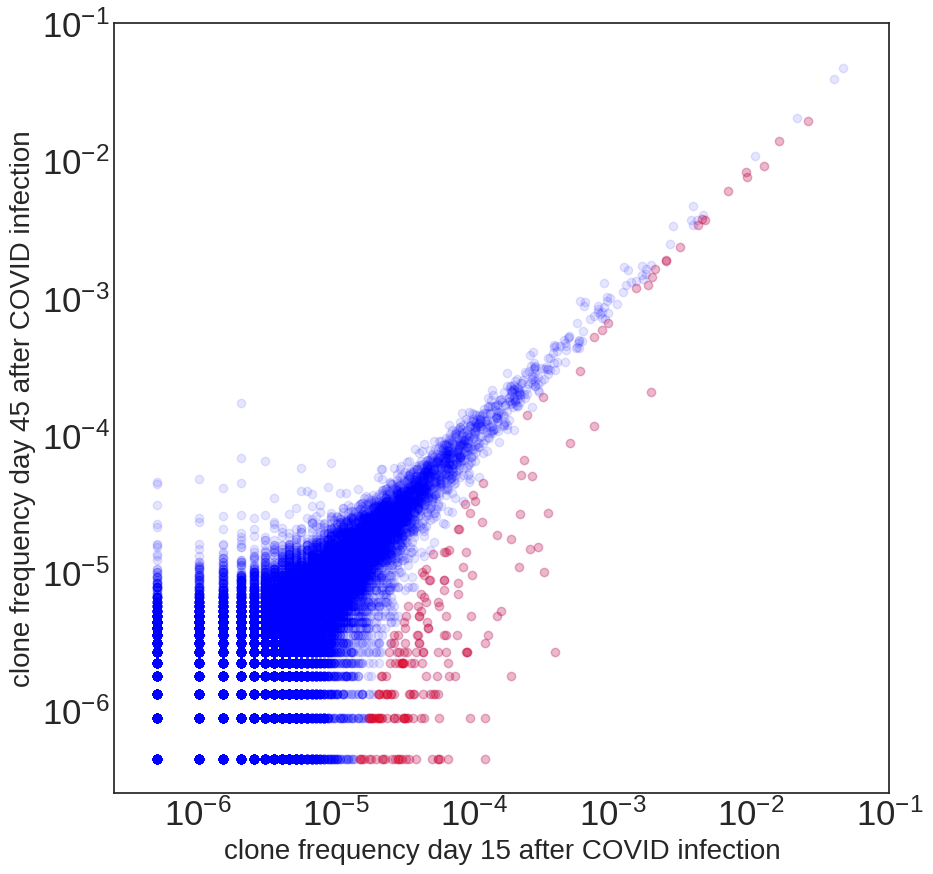

In [10]:
#Scatter plots of contracted clones
plt.figure(figsize=(10,10))

plt.style.use('seaborn-white')
plt.scatter(df_contraction['Clone_fraction_2'], df_contraction['Clone_fraction_1'], color = 'blue', alpha = 0.1)
plt.scatter(table_expansion['$f_2$'], table_expansion['$f_1$'], color = 'red', alpha = 0.2)

plt.xlabel(r'clone frequency day 15 after COVID infection', fontsize=20)
plt.ylabel(r'clone frequency day 45 after COVID infection', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])

### 3.3 Validating the identified clonotypes

In this part, we want to check that clonotypes detected by NoisET are actually biologically relevant. To do so, we can verify that there is a significant overlap between them and the open-access database of TCR from : https://clients.adaptivebiotech.com/pub/covid-2020 known to interact with SARS-Cov2 antigen. (Here the paper describing this data https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7418734/)

Let's import the table! 

In [ ]:
def import_mira_clones(path):
  mira_clones = pd.read_csv(path).loc[:,['TCR BioIdentity']]
  uniques = set(mira_clones['TCR BioIdentity'])
  mira_clones = pd.DataFrame(list(uniques), columns=['TCR BioIdentity'])
  mira_clones['aaCDR3'] = mira_clones['TCR BioIdentity'].str.split('+').str[0]
  mira_clones['Vgene'] = mira_clones['TCR BioIdentity'].str.split('+').str[1]
  mira_clones['Jgene'] = mira_clones['TCR BioIdentity'].str.split('+').str[2]
  return mira_clones.drop('TCR BioIdentity', axis=1)

mira_cl = import_mira_clones('/content/NoisET_tutorial/data/MIRA_clonotypes.csv')['aaCDR3'].values
print('Number of clonotypes in the MIRA database:', len(mira_cl))

Number of clonotypes in the MIRA database: 142069


We are going to use the aminoacid sequences instead of the nucleotide ones (it's faster to compare amino-acid than nucleotide strings).
For counting the overlap between two lists of sequences, we are going to use an external software. Below its installation. (This software enables to compare in a reasonable amount of time two lists of aminoacid sequences).

In [ ]:
!pip install '/content/NoisET_tutorial/ATrieGC/'

import atriegc

Processing ./NoisET_tutorial/ATrieGC
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for atriegc: filename=atriegc-0.0.1-cp37-cp37m-linux_x86_64.whl size=899839 sha256=ad04c63db0e1f5c06512a6a55b454a49412b92eb9bd91f267780f49ea3ffe24c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6nxro02i/wheels/ff/94/96/da7a87b7d6d9bcc7c845c9f04b3da98cc6476a19f66c566e46
Successfully built atriegc


Now we can count how many clonotypes of our noiset list are also present in the mira list.

In [ ]:
def build_shared_clones(mira_clones, clones, h_dist):
    # Finding matches between amino-acid sequences given Hamming distance
    trie = atriegc.TrieAA()
    trie.insert_list(mira_clones)        
    shared_clones = trie.shared_elements(clones, h_dist) 
    # Building dictionary {candidate_clonotype : list_of_mira_clnotype_matches}
    shared_clones_d = dict()
    for [cl_mira, cl] in shared_clones:
        if cl not in shared_clones_d:
            shared_clones_d[cl] = [cl_mira]
        else:
            shared_clones_d[cl].append(cl_mira)
    return shared_clones_d

noiset_cl = table_expansion['CDR3_AA'].values
shared_clones = build_shared_clones(mira_cl, noiset_cl, 0)
noiset_overlap = len(shared_clones)/len(noiset_cl)
print('The overlap between the two lists is:', noiset_overlap)

The overlap between the two lists is: 0.09183673469387756


To asses that our method works, we also need to compare this number with a "dummy" way of selecting interesting clonotypes, i.e. by sampling at random.

In the following we generate at random a lot of different samples, compute the average overlap and its standard deviation.
Given these two number we can compute a z-score (https://en.wikipedia.org/wiki/Standard_score) to quantify how much our method deviates from the dummy one.



In [ ]:
all_aa_seqs = list(df_contraction['AACDR3'])

n_trials = 100
overlaps = []
for _ in range(n_trials):
  sample = np.random.choice(all_aa_seqs, len(noiset_cl), replace=False)
  shared_clones = build_shared_clones(mira_cl, sample, 0)
  overlaps.append(len(shared_clones)/len(noiset_cl))

In [ ]:
z = abs(noiset_overlap-np.mean(overlaps))/np.std(overlaps)
print(z)

7.864454866654799
